## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#read and show data in csv
df= pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
row_data=df.shape[0]
print('The number of row is {}'.format(row_data))

The number of row is 294478


c. The number of unique users in the dataset.

In [4]:
df[['user_id']].apply(lambda col : len(col.unique()))

user_id    290584
dtype: int64

d. The proportion of users converted.

In [5]:
np.mean(df['converted'])

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:

case_1 = len(df[(df['landing_page'] != 'new_page') &
                (df['group'] == 'treatment')])

case_2 = len(df[(df['landing_page'] == 'new_page') &
                 (df['group'] != 'treatment')])



case_1 + case_2

3893

f. Do any of the rows have missing values?

In [7]:
pd.isnull(df).any()
#no missing value

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.query("(group == 'control' and landing_page == 'old_page') or (group == 'treatment' and landing_page == 'new_page')")

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2[['user_id']].apply(lambda col : len(col.unique()))

user_id    290584
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
duplicated=df2.duplicated('user_id')
print('repeated user id: {}'.format(duplicated))
df2[duplicated]

repeated user id: 0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
          ...  
294448    False
294449    False
294450    False
294451    False
294452    False
294453    False
294454    False
294455    False
294456    False
294457    False
294458    False
294459    False
294460    False
294461    False
294462    False
294463    False
294464    False
294465    False
294466    False
294467    False
294468    False
294469    False
294470    False
294471    False
294472    False
294473    False
294474    False
294475    False
294476    False
294477    False
Length

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [12]:
#checking user_id=773192 is duplicate
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2 = df2.drop_duplicates(subset=['user_id', 'group', 'landing_page', 'converted'])


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
probability= df2['converted'].mean()
print('The probability of an individual converting: {}'.format(probability))

The probability of an individual converting: 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
probability= df2[df2['group']=='control'].loc[:,'converted'].mean()
print('The probability of an individual converting for control: {}'.format(probability))

The probability of an individual converting for control: 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
probability= df2[df2['group']=='treatment'].loc[:,'converted'].mean()
print('The probability of an individual converting for control: {}'.format(probability))

The probability of an individual converting for control: 0.11880806551510564


d. What is the probability that an individual received the new page?

In [19]:
len(df2.query("landing_page == 'new_page'")) / df2.shape[0]

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**There is a slight difference between the ratio of the old page and the ratio of the new page according to the above calculation. This difference indicates that the old page is more convented than the new page.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_{0}$ : $p_{old}$ >= $p_{new}$

$H_{1}$ : $p_{old}$ < $p_{new}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
p_new=df2['converted'].mean()
print('The convert rate for Pnew: {} '.format(p_new))

The convert rate for Pnew: 0.11959708724499628 


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old=df2['converted'].mean()
print('The convert rate for Pold: {} '.format(p_old))

The convert rate for Pold: 0.11959708724499628 


c. What is $n_{new}$?

In [22]:
nnew_df=df2[df2['landing_page']=='new_page']
n_new=len(nnew_df)
print('Nnew: {} '.format(n_new))

Nnew: 145310 


d. What is $n_{old}$?

In [23]:
nold_df=df2[df2['landing_page']=='old_page']
n_old=len(nold_df)
print('Nold: {} '.format(n_old))

Nold: 145274 


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.binomial(n_new,p_new)
print('New page converted: {}'.format(new_page_converted))

New page converted: 17260


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.binomial(n_old,p_old)
print('Old page converted: {}'.format(old_page_converted))

Old page converted: 17297


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
result=(new_page_converted/n_new)-(old_page_converted/n_old)
print('Result: {}'.format(result))

Result: -0.0002841258544113434


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [27]:
p_diffs=[]
for i in range(10000):
    new_page_converted=np.random.binomial(n=1,p=p_new,size=n_new)
    old_page_converted=np.random.binomial(n=1,p=p_old,size=n_old)
    diff=new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

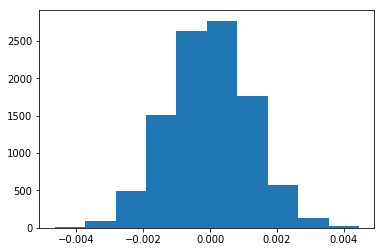

In [28]:
plt.hist(p_diffs);


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
actual_diff = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean()
p_diffs = np.array(p_diffs)
(actual_diff < p_diffs).mean()

0.90339999999999998

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**This value is probability value called "P value" in the scientific studies. The P value shows a statistically significant difference when compared with the amount of possible error we will make when we decide. Evidence of statistically significant difference increases as P value decreases. 
If p value is large, the hypothesis is more likely to be true.**

**In part 1: Control group's conversion rate is equal to treatment group's conversion rate according to null hypothesis. The ratio calculated at section j shows that the reality is more than the difference is by necessity.**

**A low p value which is less than 0.05 indicates that the null hypothesis is unlikely to be real. It would not be right to reject the null hypothesis that p is a large value. so the use of the current page should be continued.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm
n_old = len(df2[df2["group"] == 'control'])
n_new = len(df2[df2["group"] == 'treatment'])
c_old = sum(df2[df2["group"] == 'control']['converted'])
c_new = sum(df2[df2["group"] == 'treatment']['converted'])
print(n_old, n_new, c_old, c_new )


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


145274 145310 17489 17264


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
z_score, p_value = sm.stats.proportions_ztest([c_old, c_new], [n_old, n_new], alternative='larger')
print("z_score: {}".format(z_score))
print("p_value: {}".format(p_value))

z_score: 1.3109241984234394
p_value: 0.09494168724097551


In [32]:
from scipy.stats import norm
print(norm.ppf(1-0.05))

1.64485362695


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**
For each variable value, the difference of the average is taken and the difference obtained is divided by the standard deviation. 1.3109241984234394 is less than 1.64485362695. This situation shows that the hypothesis is more likely to be true. so I agree with j and k calculations. **

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
df2['intercept'] = 1
df2[['drop', 'ab_page']] = pd.get_dummies(df2['group'])

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [34]:
logit = sm.Logit(df2['converted'],df2[['intercept' ,'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 29 May 2018   Pseudo R-squ.:               8.077e-06
Time:                        08:45:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**P>|z| value is 0.190. This is different value than calculated p in Part 2. There is no relationship between dependent and independent variables according to null hypothesis with logistic regression. 
So there is no correlation between the user's interaction on the page and the conversion rate. This value shows us that the old pages are better than the new ones.**

**A one-way test was performed for the previous p value calculated. For this p value, a two-way test was performed. Therefore, the p values are different from each other.**

**We can show this idea in this formula.**
$$H_0: P_{new} = P_{old} $$
$$ H_1: P_{new} \neq P_{old} $$

**We test whether they are greater than or equal or not in these tests.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Adding new factors to the regression is important for the success of the estimation. 
In real life, there are many determinants that affect a target variable. For example, company profit is the target variable. There are many factors that affect the profit. In the regression model, more than one factor selection helps to make more accurate estimations. But using too many variables can also be a disadvantage for the regression model. Too many variables can force readability of the regression.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [36]:
df = pd.read_csv('countries.csv')
df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [37]:
df3 = df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df3.head()

,country,timestamp,group,landing_page,converted,intercept,drop,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [38]:
df3['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [39]:
df_dummy=pd.get_dummies(df3['country'])
df_dummy.head()

df3 = pd.concat([df3,df_dummy], axis=1)

In [40]:
df3['intercept']=1
logical_model = sm.Logit(df3['converted'], df3[['CA', 'US','intercept']])
result = logical_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 29 May 2018   Pseudo R-squ.:               1.521e-05
Time:                        08:45:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [41]:
df3['new_CA'] = df3['ab_page']*df3['CA']
df3['new_UK'] = df3['ab_page']*df3['UK']
df3['new_US'] = df3['ab_page']*df3['US']

In [42]:
df3.head()

,country,timestamp,group,landing_page,converted,intercept,drop,ab_page,CA,UK,US,new_CA,new_UK,new_US
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,0,1,0


In [43]:
logistic_model = sm.Logit(df3['converted'], \
    df3[['intercept', 'ab_page', 'US', 'new_US', 'UK', 'new_UK']])
result = logistic_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 29 May 2018   Pseudo R-squ.:               3.482e-05
Time:                        08:45:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
new_US         0.0469      0.054      0.872      0.383      -0.059       0.152
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
new_UK         0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

**In section g, we checked the link between the country and the converted ones. We did this using the logistic regression model and the resulting high value of p showed us that there was no relationship in between.
Then we checked by adding a new new_UK and new_US values, acting on the assumption that there is no relationship in section h, perhaps due to another factor. New_UK and new_US showed us both users who are citizens of that country and who saw the new page. With these variables, we found the answer to the question of whether the people who saw the new page were dependent on the country to be converted. we also obtained a high p-value at the end of this calculation. A high p-value is observed in the above calculations and this is statistically insignificant.**

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!




## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb']) 

0